In [2]:
from scipy.misc import imread
import pandas as pd
import PIL
from PIL import Image
from scipy.misc import imresize
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np
from memory_profiler import memory_usage

In [3]:
train_f = pd.read_csv('/home/sidhraj/Documents/AV/Age_Detection_Problem/train.csv')
test_f = pd.read_csv('/home/sidhraj/Documents/AV/Age_Detection_Problem/test.csv')
ID = train_f['ID']
ID1 = test_f['ID']

In [3]:
## TO load and show images :

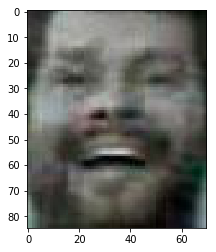

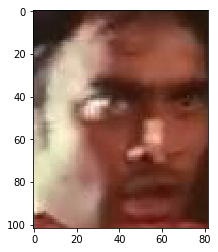

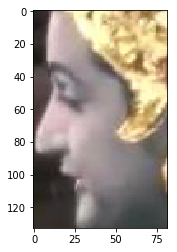

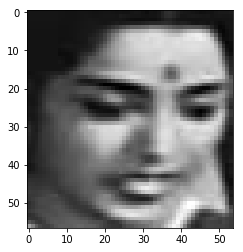

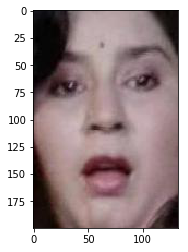

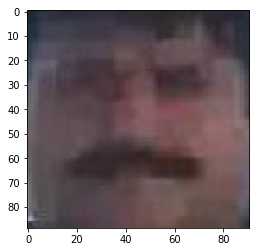

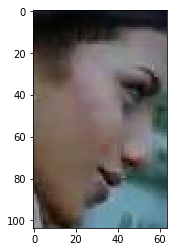

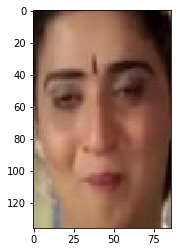

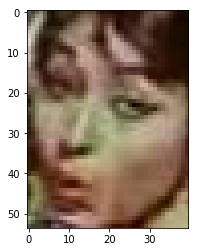

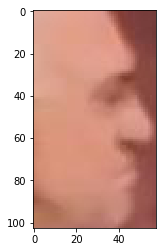

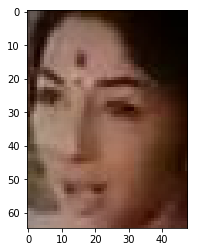

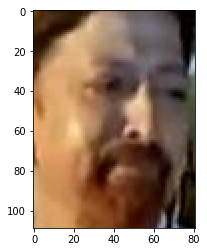

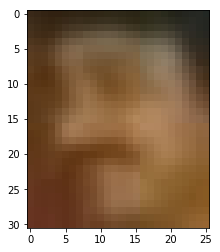

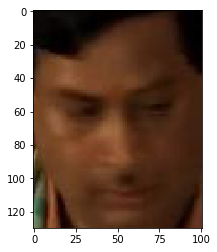

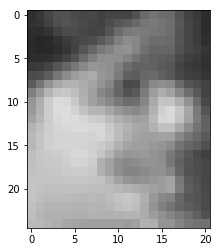

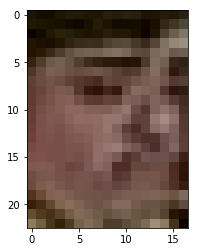

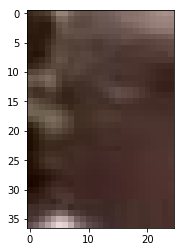

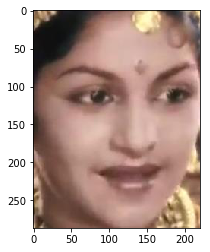

KeyboardInterrupt: 

In [4]:
for i in range(19906):
    file = ID[i]
    image = imread('/home/sidhraj/Documents/AV/Age_Detection_Problem/Train/' + file)
    plt.imshow(image)
    plt.show()

In [5]:
### To resize all the training images to a common size:

In [30]:
train_r = []
for i in range(19906):
    file = ID[i]
    image = imread('/home/sidhraj/Documents/AV/Age_Detection_Problem/Train/' + file)
    image = imresize(image, (32, 32))
    image = image.astype('float32') # this will help us in later stage
    train_r.append(image)
    
train_x = np.stack(train_r)

ValueError: cannot reshape array of size 61151232 into shape (784)

In [49]:
### To resize all the test  images to a common size:

In [8]:
test_resize = []
for i in range(6636):
    file = ID1[i]
    image = imread('/home/sidhraj/Documents/AV/Age_Detection_Problem/Test/' + file)
    image = imresize(image, (32, 32))
    image = image.astype('float32') # this will help us in later stage  
    test_resize.append(image)
    
test_x = np.stack(test_resize)      

In [9]:
#Normalize the images to train faster, 255 is the max value, so divide by 255 to normalize

In [10]:
train_x = train_x / 255
test_x = test_x / 255

In [ ]:
# lets see what is the data distirbution

In [11]:
train_f.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [12]:
# Encoding the classes 

In [4]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train_f.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

Using TensorFlow backend.
/home/sidhraj/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [5]:
# building a feed forward model
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
from keras.callbacks import EarlyStopping

In [15]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 5
batch_size = 128

In [16]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [18]:
#training the model

In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/5
19906/19906 [==============================] - 7s 336us/step - loss: 0.8981 - acc: 0.5734
Epoch 2/5
19906/19906 [==============================] - 7s 336us/step - loss: 0.8496 - acc: 0.5993
Epoch 3/5
19906/19906 [==============================] - ETA: 0s - loss: 0.8249 - acc: 0.618 - 7s 329us/step - loss: 0.8249 - acc: 0.6189
Epoch 4/5
19906/19906 [==============================] - 7s 332us/step - loss: 0.8171 - acc: 0.6207
Epoch 5/5
19906/19906 [==============================] - 7s 330us/step - loss: 0.8100 - acc: 0.6264


In [20]:
# validating the model

In [21]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 6s 370us/step - loss: 0.8009 - acc: 0.6319 - val_loss: 0.8164 - val_acc: 0.6160
Epoch 2/5
15924/15924 [==============================] - 6s 349us/step - loss: 0.7986 - acc: 0.6333 - val_loss: 0.7906 - val_acc: 0.6404
Epoch 3/5
15924/15924 [==============================] - 6s 352us/step - loss: 0.7961 - acc: 0.6372 - val_loss: 0.8282 - val_acc: 0.6042
Epoch 4/5
15924/15924 [==============================] - 6s 354us/step - loss: 0.7898 - acc: 0.6353 - val_loss: 0.7846 - val_acc: 0.6497
Epoch 5/5
15924/15924 [==============================] - 6s 352us/step - loss: 0.7844 - acc: 0.6429 - val_loss: 0.8053 - val_acc: 0.6369


In [24]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=7,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/7
15924/15924 [==============================] - 6s 371us/step - loss: 0.7472 - acc: 0.6658 - val_loss: 0.7485 - val_acc: 0.6678
Epoch 2/7
15924/15924 [==============================] - 6s 375us/step - loss: 0.7436 - acc: 0.6696 - val_loss: 0.8008 - val_acc: 0.6231
Epoch 3/7
15924/15924 [==============================] - 6s 364us/step - loss: 0.7438 - acc: 0.6650 - val_loss: 0.7493 - val_acc: 0.6595
Epoch 4/7
15924/15924 [==============================] - 6s 363us/step - loss: 0.7395 - acc: 0.6692 - val_loss: 0.7376 - val_acc: 0.6763
Epoch 5/7
15924/15924 [==============================] - 6s 358us/step - loss: 0.7359 - acc: 0.6711 - val_loss: 0.7386 - val_acc: 0.6710
Epoch 6/7
15924/15924 [==============================] - 6s 360us/step - loss: 0.7319 - acc: 0.6745 - val_loss: 0.7319 - val_acc: 0.6803
Epoch 7/7
15924/15924 [==============================] - 6s 359us/step - loss: 0.7303 - acc: 0.6752 - val_loss: 0.7375 - val_acc:

In [ ]:
# predicting for test data

In [25]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)
test_f['Class'] = pred
test_f.to_csv('sol2.csv', index=False)

6636/6636 [==============================] - 1s 220us/step


In [ ]:
## just to compare whether predicted values with original class for training data set

In [ ]:
for i in range(19906):
    file = ID[i]
    image = imread(('/home/sidhraj/Documents/AV/Age_Detection_Problem/Train/' + file)).astype('float32')
    image = imresize(image, (128,128))
    pred = model.predict_classes(train_x)
    orig = train_f.Class[i]
    plt.imshow(image)
    plt.show()
    print ('Original: ', orig, 'predicted: ', lb.inverse_transform(pred[i]))

In [44]:
### Data pre processing for MLP (Multi Layer Perceptron)


In [6]:
train_r2 = []
for i in range(19906):
    file = ID[i]
    image = imread('/home/sidhraj/Documents/AV/Age_Detection_Problem/Train/' + file, flatten=True)
    image = imresize(image, (32, 32))
    image = image.astype('float32') # this will help us in later stage
    train_r2.append(image)
    
train_x2 = np.stack(train_r2)
train_x2 /= 255.0

train_x2 = train_x2.reshape(-1, 1024).astype('float32')

In [ ]:
# Data Processing for test

In [7]:
test_r2 = []
for i in range(6636):
    file = ID1[i]
    image = imread('/home/sidhraj/Documents/AV/Age_Detection_Problem/Test/' + file, flatten=True)
    image = imresize(image, (32, 32))
    image = image.astype('float32') # this will help us in later stage  
    test_r2.append(image)
    
    
test_x2 = np.stack(test_r2)
test_x2 /= 255.0
test_x2 = test_x2.reshape(-1, 1024).astype('float32')

In [8]:
# Model 2

from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

In [67]:
# define vars
input_num_units = 1024 ### the image is 32X32=1024
hidden1_num_units = 1500
hidden2_num_units = 1000
#hidden3_num_units = 1000
#hidden4_num_units = 1000
hidden5_num_units = 1500
output_num_units = 3

epochs = 50
batch_size = 200

dropout_ratio = 0.2

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(dropout_ratio),
 #Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 #Dropout(dropout_ratio),
 #Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 #Dropout(dropout_ratio),
 #Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 #Dropout(dropout_ratio),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')## not using

/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="relu", units=1200)`
  app.launch_new_instance()
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1200, activation="relu", units=1000)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1200, activation="softmax", units=3)`


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_29 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 3075      
Total params: 1,052,675
Trainable params: 1,052,675
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Plotting epochs vs accuracy

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x2, train_y, nb_epoch=epochs, batch_size=batch_size, validation_split=0.1)

/home/sidhraj/anaconda3/lib/python3.6/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 17915 samples, validate on 1991 samples
Epoch 1/50
17915/17915 [==============================] - 16s 893us/step - loss: 1.0377 - acc: 0.5500 - val_loss: 0.8490 - val_acc: 0.6017
Epoch 2/50
17915/17915 [==============================] - 15s 860us/step - loss: 0.8617 - acc: 0.5882 - val_loss: 0.8361 - val_acc: 0.5962
Epoch 3/50
17915/17915 [==============================] - 15s 861us/step - loss: 0.8457 - acc: 0.5958 - val_loss: 0.8112 - val_acc: 0.6138
Epoch 4/50
17915/17915 [==============================] - 17s 943us/step - loss: 0.8343 - acc: 0.5990 - val_loss: 0.8035 - val_acc: 0.6153
Epoch 5/50
17915/17915 [==============================] - 16s 868us/step - loss: 0.8292 - acc: 0.6021 - val_loss: 0.8142 - val_acc: 0.6228
Epoch 6/50
17915/17915 [==============================] - 16s 875us/step - loss: 0.8189 - acc: 0.6084 - val_loss: 0.7979 - val_acc: 0.6138
Epoch 7/50
17915/17915 [==============================] - 16s 884us/step - loss: 0.8170 - acc: 0.6108 - val_loss: 0.8

In [37]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

NameError: name 'history' is not defined

In [ ]:
# prediction

In [112]:
pred = model.predict_classes(test_x2)
pred = lb.inverse_transform(pred)


6636/6636 [==============================] - 1s 137us/step


In [113]:
import csv
csvfile = "/home/sidhraj/Documents/AV/Age_Detection_Problem/solMLP.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in pred:
        writer.writerow([val]) 


In [ ]:
##The accuracy is still under 70, so trying for CNN

In [98]:
# reshape data

train_x3 = train_x2.reshape(-1, 32, 32, 1)
#val_x_temp = val_x.reshape(-1, 32, 32, 1) for vslidation data
test_x3 = test_x2.reshape(-1, 32, 32, 1)

# define vars
input_shape = (1024,)
input_reshape = (32, 32, 1)

conv_num_filters = 4 # 3 #6 #5 #3
conv_filter_size = 2 #5

pool_size = (2, 2)

hidden_num_units = 1024
output_num_units = 3

epochs = 25
batch_size = 120
dropout_ratio = 0.5

model = Sequential([
 InputLayer(input_shape=input_reshape),
#                  5  5      4 4   
 Convolution2D(25, 3, 3, activation='relu'),
 MaxPooling2D(pool_size=pool_size),
#              25, 5, 5     3  3
 Convolution2D(25, 1, 1, activation='relu'),
 MaxPooling2D(pool_size=pool_size),
#              25, 4,4     2  2
 #Convolution2D(25, 5, 5, activation='relu'),

 Flatten(),

 Dense(output_dim=hidden_num_units, activation='relu'),

 Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_conv = model.fit(train_x3, train_y, nb_epoch=epochs, batch_size=batch_size, validation_split=0.2)

/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (3, 3), activation="relu")`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (1, 1), activation="relu")`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1024, activation="softmax", units=3)`
/home/sidhraj/anaconda3/lib/python3.6/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 15924 samples, validate on 3982 samples
Epoch 1/25
15924/15924 [==============================] - 38s 2ms/step - loss: 0.8798 - acc: 0.5777 - val_loss: 0.8076 - val_acc: 0.6336
Epoch 2/25
15924/15924 [==============================] - 44s 3ms/step - loss: 0.8050 - acc: 0.6273 - val_loss: 0.7724 - val_acc: 0.6575
Epoch 3/25
15924/15924 [==============================] - 27s 2ms/step - loss: 0.7731 - acc: 0.6528 - val_loss: 0.7855 - val_acc: 0.6504
Epoch 4/25
15924/15924 [==============================] - 20s 1ms/step - loss: 0.7423 - acc: 0.6703 - val_loss: 0.7392 - val_acc: 0.6816
Epoch 5/25
15924/15924 [==============================] - 33s 2ms/step - loss: 0.7154 - acc: 0.6890 - val_loss: 0.7344 - val_acc: 0.6838
Epoch 6/25
15924/15924 [==============================] - 40s 3ms/step - loss: 0.6894 - acc: 0.6989 - val_loss: 0.7238 - val_acc: 0.6826
Epoch 7/25
15924/15924 [==============================] - 40s 3ms/step - loss: 0.6587 - acc: 0.7173 - val_loss: 0.7046 - val_acc:

In [94]:
pred = model.predict_classes(test_x3)
pred = lb.inverse_transform(pred)

import csv
csvfile = "/home/sidhraj/Documents/AV/Age_Detection_Problem/CNN14.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in pred:
        writer.writerow([val]) 


6636/6636 [==============================] - 8s 1ms/step
